In [1]:
# Import necessary libraries/packages and matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#import plotly.express as px
import seaborn as sns
import math


%matplotlib inline

In [57]:
# meta contains patient metadata
meta = pd.read_csv('airway_metadata.csv')

# df is the RNA-Seq data
df = pd.read_csv('airway_scaledcounts.csv')

# gene annotations to symbol as gene info
gene_info = pd.read_csv('gene_info.csv')

# outer merge airway scaled counts with gene info, on ensgene id in df and User ID in gene_info
df_gene = pd.merge(df,gene_info,how = 'outer',left_on = 'ensgene', right_on = 'User ID')

# show merged dataframe df_gene
df_gene

,ensgene,SRR1039508,SRR1039509,SRR1039512,SRR1039513,SRR1039516,SRR1039517,SRR1039520,SRR1039521,i,User ID,Ensembl Gene ID,Symbol,Gene Type,Species,Chr,Position (Mbp)
0,ENSG00000000003,723.0,486.0,904.0,445.0,1170.0,1097.0,806.0,604.0,32717,ENSG00000000003,ENSG00000000003,TSPAN6,protein_coding,Human,X,100.627109
1,ENSG00000000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32716,ENSG00000000005,ENSG00000000005,TNMD,protein_coding,Human,X,100.584936
2,ENSG00000000419,467.0,523.0,616.0,371.0,582.0,781.0,417.0,509.0,29312,ENSG00000000419,ENSG00000000419,DPM1,protein_coding,Human,20,50.934867
3,ENSG00000000457,347.0,258.0,364.0,237.0,318.0,447.0,330.0,324.0,12923,ENSG00000000457,ENSG00000000457,SCYL3,protein_coding,Human,1,169.849631
4,ENSG00000000460,96.0,81.0,73.0,66.0,118.0,94.0,102.0,74.0,12919,ENSG00000000460,ENSG00000000460,C1orf112,protein_coding,Human,1,169.662007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38694,ENSG00000283115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38699,ENSG00000283115,Not mapped,NaN,NaN,NaN,NaN,NaN
38695,ENSG00000283116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11389,ENSG00000283116,ENSG00000283116,MTND3P8,processed_pseudogene,Human,CHR_HSCHR1_5_CTG32_1,235.545550
38696,ENSG00000283119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11109,ENSG00000283119,ENSG00000283119,NaN,processed_pseudogene,Human,CHR_HSCHR1_3_CTG3,103.926563
38697,ENSG00000283120,1.0,2.0,1.0,0.0,1.0,1.0,2.0,0.0,10994,ENSG00000283120,ENSG00000283120,RPL11P3,processed_pseudogene,Human,CHR_HG2334_PATCH,87.945469


In [58]:
# transpose so patients as rows, genes as columns
df_T = df_gene.transpose()

In [59]:
# remove columns that have NaNs
df_T = df_T.dropna(axis = 'columns')
df_T

,0,1,2,3,4,5,6,7,8,9,...,38682,38684,38685,38686,38687,38692,38693,38695,38697,38698
ensgene,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000283093,ENSG00000283099,ENSG00000283100,ENSG00000283101,ENSG00000283104,ENSG00000283113,ENSG00000283114,ENSG00000283116,ENSG00000283120,ENSG00000283123
SRR1039508,723,0,467,347,96,0,3413,2328,670,426,...,0,0,647,3,71,0,0,0,1,0
SRR1039509,486,0,523,258,81,0,3916,1714,372,295,...,0,0,570,3,70,0,0,0,2,0
SRR1039512,904,0,616,364,73,1,6000,2640,692,531,...,0,0,645,9,116,0,0,0,1,0
SRR1039513,445,0,371,237,66,0,4308,1381,448,178,...,0,1,369,10,45,0,0,0,0,0
SRR1039516,1170,0,582,318,118,2,6424,2165,917,740,...,0,0,688,4,95,0,0,0,1,0
SRR1039517,1097,0,781,447,94,0,10723,2262,807,651,...,0,0,670,13,83,0,0,0,1,0
SRR1039520,806,0,417,330,102,0,5039,2175,744,414,...,0,1,550,7,84,0,0,0,2,0
SRR1039521,604,0,509,324,74,0,7803,1786,685,269,...,0,1,572,7,79,0,0,0,0,0
i,32717,32716,29312,12923,12919,11788,13037,18201,17884,17753,...,31950,31708,31706,34537,31709,296,11018,11389,10994,9621


In [5]:
new_header = df_T.loc['Symbol'] # grab the gene symbol row for the header
df_T = df_T[1:] # take the data less the header row
df_T.columns = new_header # set the header row as the df header
df_T['id'] = df_T.index  # create an id column (as the last column) that repeats the patient id. Use this for merge
df_T = df_T.iloc[0:8] # only take patient info, dropping gene info amcillary data


In [6]:
df_T # show dataframe: genes as columns, patients as rows, counts as values
# Columns decreased because not all genes are in coding region presented in gene_info. 
# We only want coded genes so this reduction was desired.

Symbol,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,CCER2,SIRT2,BMS1P21,SARS2,IGKV1-8,NDUFB11P1,MTND3P8,RPL11P3,RARRES2P11,id
SRR1039508,723,0,467,347,96,0,3413,2328,670,426,...,0,647,3,71,0,0,0,1,0,SRR1039508
SRR1039509,486,0,523,258,81,0,3916,1714,372,295,...,0,570,3,70,0,0,0,2,0,SRR1039509
SRR1039512,904,0,616,364,73,1,6000,2640,692,531,...,0,645,9,116,0,0,0,1,0,SRR1039512
SRR1039513,445,0,371,237,66,0,4308,1381,448,178,...,1,369,10,45,0,0,0,0,0,SRR1039513
SRR1039516,1170,0,582,318,118,2,6424,2165,917,740,...,0,688,4,95,0,0,0,1,0,SRR1039516
SRR1039517,1097,0,781,447,94,0,10723,2262,807,651,...,0,670,13,83,0,0,0,1,0,SRR1039517
SRR1039520,806,0,417,330,102,0,5039,2175,744,414,...,1,550,7,84,0,0,0,2,0,SRR1039520
SRR1039521,604,0,509,324,74,0,7803,1786,685,269,...,1,572,7,79,0,0,0,0,0,SRR1039521


In [7]:
meta # show metadata, as we will merge it to above dataframe

,id,dex,celltype,geo_id
0,SRR1039508,control,N61311,GSM1275862
1,SRR1039509,treated,N61311,GSM1275863
2,SRR1039512,control,N052611,GSM1275866
3,SRR1039513,treated,N052611,GSM1275867
4,SRR1039516,control,N080611,GSM1275870
5,SRR1039517,treated,N080611,GSM1275871
6,SRR1039520,control,N061011,GSM1275874
7,SRR1039521,treated,N061011,GSM1275875


In [8]:
# outer merge data dataframe with metadate dataframe, with 'id' as column to merge in both dfs
merged = pd.merge(df_T,meta,how = 'outer',on = 'id') 

In [9]:
merged = merged.set_index('id') #set index from id column
merged # display merged dataframe

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,BMS1P21,SARS2,IGKV1-8,NDUFB11P1,MTND3P8,RPL11P3,RARRES2P11,dex,celltype,geo_id
id,,,,,,,,,,,,,,,,,,,,,
SRR1039508,723,0,467,347,96,0,3413,2328,670,426,...,3,71,0,0,0,1,0,control,N61311,GSM1275862
SRR1039509,486,0,523,258,81,0,3916,1714,372,295,...,3,70,0,0,0,2,0,treated,N61311,GSM1275863
SRR1039512,904,0,616,364,73,1,6000,2640,692,531,...,9,116,0,0,0,1,0,control,N052611,GSM1275866
SRR1039513,445,0,371,237,66,0,4308,1381,448,178,...,10,45,0,0,0,0,0,treated,N052611,GSM1275867
SRR1039516,1170,0,582,318,118,2,6424,2165,917,740,...,4,95,0,0,0,1,0,control,N080611,GSM1275870
SRR1039517,1097,0,781,447,94,0,10723,2262,807,651,...,13,83,0,0,0,1,0,treated,N080611,GSM1275871
SRR1039520,806,0,417,330,102,0,5039,2175,744,414,...,7,84,0,0,0,2,0,control,N061011,GSM1275874
SRR1039521,604,0,509,324,74,0,7803,1786,685,269,...,7,79,0,0,0,0,0,treated,N061011,GSM1275875


In [10]:
# drop columns where there are zeros (no counts) with greater than 40% zeros in the column
drop = (len(merged) - np.count_nonzero(merged, axis = 0)) / len(merged) * 100 < 40 
    # len for total measurements, count nonzeros in columns, divided by merged and multiply by 100 for percentage nonzero
    # set variable drop that is boolean array where the percentage nonzero is less than 40% (i.e. percentage zeros greater than 40%)
merged = merged.iloc[:,drop] #  iloc to drop columns where the boolean was false

merged # show new dataframe





,TSPAN6,DPM1,SCYL3,C1orf112,CFH,FUCA2,GCLC,NFYA,STPG1,NIPAL3,...,PRSS30P,TPBG,CPEB2,SIRT2,BMS1P21,SARS2,RPL11P3,dex,celltype,geo_id
id,,,,,,,,,,,,,,,,,,,,,
SRR1039508,723,467,347,96,3413,2328,670,426,191,2232,...,4,1260,190,647,3,71,1,control,N61311,GSM1275862
SRR1039509,486,523,258,81,3916,1714,372,295,182,1969,...,0,774,182,570,3,70,2,treated,N61311,GSM1275863
SRR1039512,904,616,364,73,6000,2640,692,531,287,5252,...,7,1034,332,645,9,116,1,control,N052611,GSM1275866
SRR1039513,445,371,237,66,4308,1381,448,178,137,2698,...,6,437,187,369,10,45,0,treated,N052611,GSM1275867
SRR1039516,1170,582,318,118,6424,2165,917,740,256,2699,...,5,1057,332,688,4,95,1,control,N080611,GSM1275870
SRR1039517,1097,781,447,94,10723,2262,807,651,234,2932,...,5,1129,390,670,13,83,1,treated,N080611,GSM1275871
SRR1039520,806,417,330,102,5039,2175,744,414,173,2495,...,1,1009,156,550,7,84,2,control,N061011,GSM1275874
SRR1039521,604,509,324,74,7803,1786,685,269,189,3206,...,3,722,239,572,7,79,0,treated,N061011,GSM1275875


In [11]:
merged = merged.loc[:,~merged.columns.duplicated()] # drop duplicates from merged

In [12]:
nan_count = merged.isnull().sum().sum()

merged = merged.fillna(0) # the groupby doesn't work in the next cells without fillna to zeros. This is odd because apparently
                          # there are no nans.

print(f'The number of nans in the dataframe is {nan_count}.')

The number of nans in the dataframe is 0.


In [13]:
means = merged.groupby('dex').mean()  # groupby treatment to find mean of each treatments
means # display means datafrane

,TSPAN6,DPM1,SCYL3,C1orf112,CFH,FUCA2,GCLC,NFYA,STPG1,NIPAL3,...,WASH5P,CLUHP10,NSFP1,TEX13C,FRG1CP,FRG1DP,FRG1EP,FRG1GP,GTF2IP12,BMS1P21
dex,,,,,,,,,,,,,,,,,,,,,
control,900.75,520.5,339.75,97.25,5219.0,2327.00,755.75,527.75,226.75,3169.50,...,1687.5,3.0,49.50,2.0,181.50,23.25,6.50,14.75,106.5,5.75
treated,658.00,546.0,316.50,78.75,6687.5,1785.75,578.00,348.25,185.50,2701.25,...,1221.0,1.5,83.25,1.0,181.25,18.25,6.25,13.50,83.5,8.25


In [14]:
stds = merged.groupby('dex').std()  #groupby for standard deviation
stds #display stds dataframe

,TSPAN6,DPM1,SCYL3,C1orf112,CFH,FUCA2,GCLC,NFYA,STPG1,NIPAL3,...,WASH5P,CLUHP10,NSFP1,TEX13C,FRG1CP,FRG1DP,FRG1EP,FRG1GP,GTF2IP12,BMS1P21
dex,,,,,,,,,,,,,,,,,,,,,
control,194.146637,93.945019,20.072784,18.643587,1336.166407,221.598736,111.887965,150.944526,53.705214,1401.431768,...,363.839250,2.160247,13.771952,0.816497,43.836819,16.090888,8.185353,10.812801,30.380915,2.753785
treated,300.327599,171.024365,94.567436,11.870833,3207.950176,363.219286,202.670504,207.973356,39.703065,530.477379,...,412.230518,1.290994,85.281397,1.154701,35.509388,3.947573,9.251126,7.895146,38.837267,4.272002


In [15]:
means.loc['mean diff'] = means.loc['control'] - means.loc['treated']  #create new row mean diff that is difference b/n control and treated

largest = means.loc['mean diff'].nlargest(10) #largest is a df with the 10 largest differences (control > treated)
smallest = means.loc['mean diff'].nsmallest(10) #smallest is a df with the 10 smallest differences (most negative: treated < control)

In [16]:
largest # display largest

FTL       100522.75
COL1A1     95540.00
COL1A2     89465.75
EEF1A1     75016.50
DCN        58251.50
COL3A1     57717.50
IGFBP5     52056.25
VIM        36370.00
CXCL12     34139.00
AKAP12     32438.75
Name: mean diff, dtype: float64

In [17]:
# create separate dataframes for the treated and control patients

treated = merged[merged['dex'] == 'treated'] 
control = merged[merged['dex'] == 'control']


In [43]:
#change potential outliers to the mean with 2 standard deviation test

treated_numeric = treated.select_dtypes([np.number]).columns.values #first, find only columns with numeric data

treated_1 = treated.loc[:,treated_numeric]  #for treated_1 df, only select columns that are numeric
#make copies, one which we'll change in removing outliers, another which will be the dataframe before changing
treated_changed = treated_1.copy()
treated_before = treated_1.copy()

#count total outliers changed
total_changed = 0

#for loop for every column
for col in treated_changed.columns:
    #find mean and std of the columns
    col_mean = treated_changed[col].mean()
    col_std = treated_changed[col].std()
    
    #perform outlier test: if abs(X-mean) > 2*std, then replace with mean
    treated_changed.loc[(abs(treated_changed[col] - col_mean)) > (2 * col_std),col] = col_mean
    
    #count number changed in the column. before the subtraction sign counts the number of rows in the column
    #after the subtraction sign use a boolean matrix. Checks to see which rows remained the same. Then adds
    #those rows that remained the same. Expect changes = 0 if no changes
    changes = treated_before[col].count() - (treated_before[col] == treated_changed[col]).sum()
    
    #add changes for each row to the counter for total
    total_changed += changes

print(f'The number of potential outliers that were changed is {total_changed}.')

The number of potential outliers that were changed is 0.


In [44]:
# Used in the cell below to see which columns are numeric
# Want to check that the dataframes of treated and control are the same size
treated_numeric = treated.select_dtypes([np.number]).columns.values
treated_1 = treated.loc[:,treated_numeric]
control_numeric = control.select_dtypes([np.number]).columns.values
control_1 = control.loc[:,control_numeric]

In [45]:
# check to make sure treated_1 and control_1 have same number of genes
print(len(treated_1.columns) - (treated_1.columns == control_1.columns).sum())
print('This means that the treated and control have same number of genes')

0
This means that the treated and control have same number of genes


In [60]:
# Paired sample t-test

from scipy import stats #import stats package

gene_p = {}  #initialize gene_p-value dictionary
for gene in treated_1.columns:  #for loop through columns, i.e. genes
    ttest, pval = stats.ttest_rel(treated_1[gene],control_1[gene])  #ttest function from stats, rel for paired sample t-test
    gene_p[gene] = pval  #add to the dictionary

gene_p

{'TSPAN6': 0.056530976305613635,
 'DPM1': 0.8060565274406255,
 'SCYL3': 0.7092428509461964,
 'C1orf112': 0.029198886734816683,
 'CFH': 0.3441096902729238,
 'FUCA2': 0.1502474822963041,
 'GCLC': 0.050172502140912525,
 'NFYA': 0.05586372698404546,
 'STPG1': 0.3472566612139922,
 'NIPAL3': 0.5634191497270467,
 'LAS1L': 0.42309614442133703,
 'ENPP4': 0.8680541815626075,
 'SEMA3F': 0.31969576252343734,
 'CFTR': 0.19096965610238692,
 'ANKIB1': 0.23401512631819602,
 'CYP51A1': 0.0742917903873958,
 'KRIT1': 0.535441546091618,
 'RAD52': 0.058666407408115816,
 'MYH16': 0.5942727634181963,
 'BAD': 0.6677351122608695,
 'LAP3': 0.9633741283361028,
 'CD99': 0.7718785240931736,
 'HS3ST1': 0.6638080120323688,
 'AOC1': 0.7306151529114,
 'WNT16': 0.36303325175256296,
 'HECW1': 0.9542294265556839,
 'MAD1L1': 0.6717224322852389,
 'LASP1': 0.3975249349535213,
 'SNX11': 0.48257867901058177,
 'TMEM176A': 0.7546833698452404,
 'M6PR': 0.37895036380418146,
 'KLHL13': 0.0031311134508773945,
 'CYP26B1': 0.08945629

In [47]:
gene_df = pd.DataFrame(gene_p.values(),gene_p.keys()) #convert dictionary to dataframe

In [48]:
gene_df.describe() #df.describe to get data on p-values

,0
count,16982.000000
mean,0.439457
std,0.297912
min,0.000000
25%,0.172618
50%,0.404298
75%,0.692471
max,1.000000


In [49]:
p_nans = gene_df.isnull().sum().sum() # Count NaNs in p-value datafarame. This is where the means are exactly the same?
print(f'The amount of NaNs in the p-value datafarme is {p_nans}.')

The amount of NaNs in the p-value datafarme is 3.


In [50]:
gene_df = gene_df.rename(columns = {0:'p-value'})  #rename column to be p-value
gene_df = gene_df.fillna(1) # for NaNs, repalce with 1 (i.e. no difference)

In [51]:
# New dataframe with only significant genes (p-value less than 0.001)
gene_df_sig = gene_df[gene_df['p-value'] < 0.001]  # new df gene_df_sig with cutoff of p-value < 0.001

In [52]:
merged_sig = merged[gene_df_sig.index]  #from the merged df above (all patients and genes), just select those that 
                                        #are in the significant gene pool

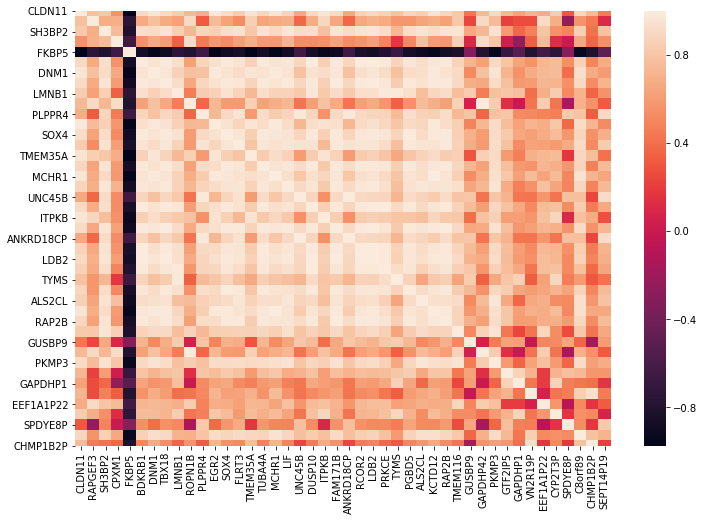

In [53]:
# Correlation plot
plt.figure(figsize = [12,8])
corrplot = sns.heatmap(merged_sig.corr())
#df.corr to create the correlation between numerical values.
#Use seaborns heatmap to create a heatmap on the df.corr
#We named the plot corrplot to use seaborns functions below

#set x tick labels by first getting the labels, then specify text rotation at 45 degrees 
# and align horizontally at the right edge of the tick.
plt.show()

#Not much clinical significance. We will put this in the appendix

In [54]:
# data from merged (top 100) into http://bioinformatics.sdstate.edu/go/ with p-value 0.1
enriched = pd.read_csv('enrichment.csv')

In [30]:
enriched

,Enrichment FDR,Genes in list,Total genes,Functional Category,Genes
0,0.097509,5,144,Detoxification,ENSG00000169715 ENSG00000187193 ENSG0000015596...
1,0.097509,11,770,Inorganic ion homeostasis,ENSG00000140090 ENSG00000169715 ENSG0000017021...
2,0.097509,2,12,Positive regulation of voltage-gated calcium c...,ENSG00000175538 ENSG00000165995
3,0.097509,3,41,Positive regulation of protein acetylation,ENSG00000124766 ENSG00000128342 ENSG00000100784
4,0.097509,3,33,Positive regulation of peptidyl-lysine acetyla...,ENSG00000124766 ENSG00000128342 ENSG00000100784
5,0.097509,10,597,Cellular metal ion homeostasis,ENSG00000140090 ENSG00000169715 ENSG0000017021...
6,0.097509,7,321,Positive regulation of cytosolic calcium ion c...,ENSG00000170214 ENSG00000204882 ENSG0000027518...
7,0.097509,3,45,Negative regulation of stress-activated MAPK c...,ENSG00000120129 ENSG00000150593 ENSG00000179094
8,0.097509,3,30,Positive regulation of Rho protein signal tran...,ENSG00000204882 ENSG00000275181 ENSG00000168542
9,0.097509,5,170,Negative regulation of MAPK cascade,ENSG00000120129 ENSG00000128342 ENSG0000010023...


Text(0.5, 0, 'Functional Category')

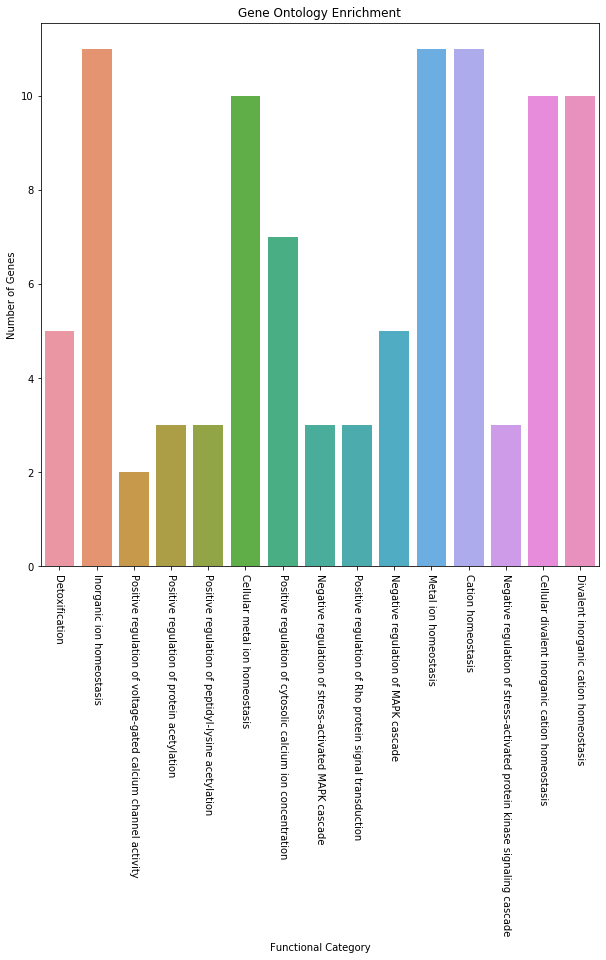

In [31]:
# Barplot for gene ontology enrichment data
plt.figure(figsize = [10,10])
sns.barplot('Functional Category','Genes in list',data = enriched)
plt.xticks(rotation=270)
plt.title('Gene Ontology Enrichment')
plt.ylabel('Number of Genes')
plt.xlabel('Functional Category')

In [32]:
# Begin working towards volcano plot

# Fold change as mean of control divided by mean of treated
div = means.loc['control'] / means.loc['treated']

div = div.dropna() # drop NaNs
div2 = np.log2(div) # log base 2 of fold change

div2 = div2.replace([np.inf, -np.inf],np.nan) # replace negative and positive infinity with np.nan
div2 = div2.dropna() # drop NaNs

div3 = pd.DataFrame(div2) # make the array a dataframe
div3.columns = ['log2 fold change'] # change column name
div3 # print the dataframe

,log2 fold change
TSPAN6,0.453039
DPM1,-0.069003
SCYL3,0.102268
C1orf112,0.304418
CFH,-0.357694
...,...
FRG1DP,0.349334
FRG1EP,0.056584
FRG1GP,0.127756
GTF2IP12,0.351005


In [55]:
# merge_vol dataframe from pd.merge of div3 and gene_df (p-values)
merge_vol = pd.merge(div3,gene_df,left_index= True, right_index = True) 
merge_vol['-log10 p'] = -np.log10(merge_vol['p-value']) # add column that is -log10 of the p-values
merge_vol # show merge_vol

,log2 fold change,p-value,-log10 p
TSPAN6,0.453039,0.056531,1.247714
DPM1,-0.069003,0.806057,0.093635
SCYL3,0.102268,0.709243,0.149205
C1orf112,0.304418,0.029199,1.534634
CFH,-0.357694,0.344110,0.463303
...,...,...,...
FRG1DP,0.349334,0.583137,0.234229
FRG1EP,0.056584,0.922273,0.035141
FRG1GP,0.127756,0.730132,0.136599
GTF2IP12,0.351005,0.346846,0.459864


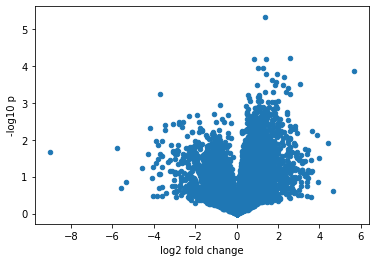

In [34]:
# Scatter plot with pandas function
merge_vol.plot.scatter('log2 fold change','-log10 p')

In [36]:
# Redo scatter plot, but in plotly

#make lists of x and y for volcano plot
xvol = list(merge_vol['log2 fold change'])
yvol = list(merge_vol['-log10 p'])

# plotly express scatter plot for -log10 p-value vs. log2 fold change 
###fig = px.scatter(x = xvol,y = yvol)
#fig.update_layout(title = 'Volcano Plot',xaxis_title = 'log2 fold change', yaxis_title = '-log10 p-value')
#fig.show()

In [37]:
# Plot the dataframes with the largest and smallest mean differences from above

# Convert to pandas dataframes
largest_df = pd.DataFrame(largest)
smallest_df = pd.DataFrame(smallest)

# in smallest_df, add column that is the absolute value of the mean difference
smallest_df['mean diff abs'] = abs(smallest_df['mean diff'])
smallest_df # show smallest_df

,mean diff,mean diff abs
THBS1,-102637.25,102637.25
CEMIP,-75725.50,75725.50
ACTB,-50301.00,50301.00
ADAMTS1,-36398.50,36398.50
FSTL1,-31922.25,31922.25
GLUL,-28375.50,28375.50
FLNA,-27710.25,27710.25
ADH1B,-25986.75,25986.75
FBN2,-23569.75,23569.75
TPM4,-23220.75,23220.75


Text(0.5, 1.0, 'Count Difference for Control > Treated')

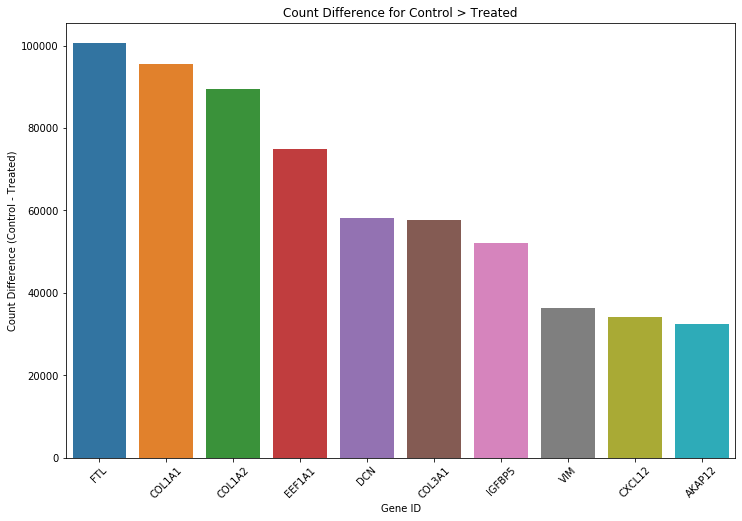

In [38]:
# Barplot for the mean difference differentially expressed genes where control greater than treated

plt.figure(figsize = (12,8))
sns.barplot(largest_df.index,'mean diff', data = largest_df) # seaborns barplot with genes (index) on x, mean diff on y
plt.xticks(rotation = 45)
plt.xlabel('Gene ID')
plt.ylabel('Count Difference (Control - Treated)')
plt.title('Count Difference for Control > Treated')

Text(0.5, 1.0, 'Count Difference for Treated > Control')

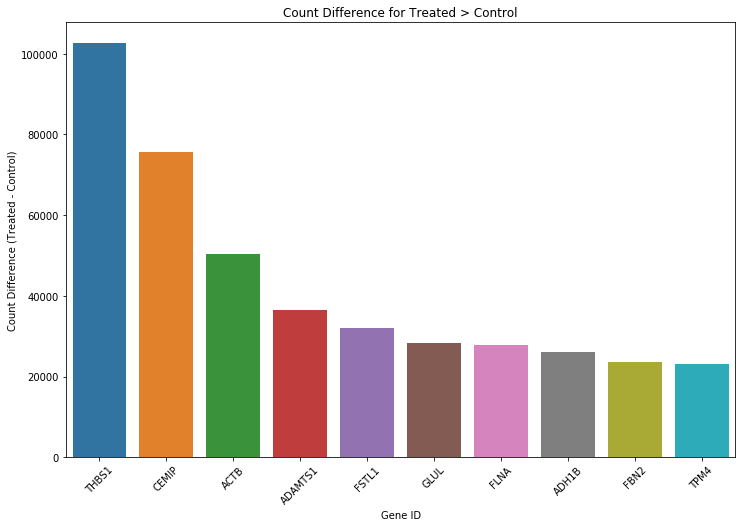

In [39]:
# Barplot for the mean difference differentially expressed genes where treated greater than control

plt.figure(figsize = (12,8))
sns.barplot(smallest_df.index,'mean diff abs', data = smallest_df) # seaborns barplot with genes (index) on x, mean diff on y
plt.xticks(rotation = 45)
plt.xlabel('Gene ID')
plt.ylabel('Count Difference (Treated - Control)')
plt.title('Count Difference for Treated > Control')

In [40]:
# Data manipulation to make categorical plots for the largest and smallest differential expression difference

# retrieve indices of smallest/larges and make new dataframes that is the merged dataframe with only the 10 genes as
# the columns
indices_s = list(smallest_df.index)
df_small = merged[indices_s]

indices_l = list(largest_df.index)
df_large = merged[indices_l]

# copy the metadata dataframe and set index to id
meta_cat = meta.copy()
meta_cat = meta_cat.set_index('id')


,sample,gene,count,dex
0,SRR1039508,THBS1,39038.0,control
1,SRR1039509,THBS1,66265.0,treated
2,SRR1039512,THBS1,61094.0,control
3,SRR1039513,THBS1,120236.0,treated
4,SRR1039516,THBS1,41460.0,control
...,...,...,...,...
75,SRR1039513,TPM4,40837.0,treated
76,SRR1039516,TPM4,47001.0,control
77,SRR1039517,TPM4,106416.0,treated
78,SRR1039520,TPM4,34651.0,control


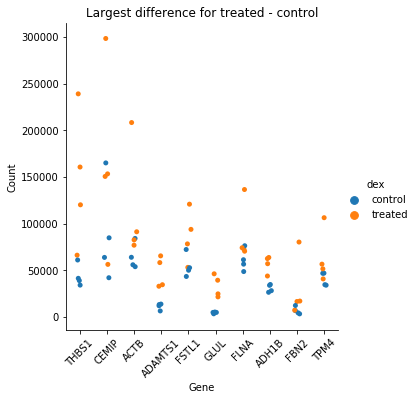

In [62]:
# Data manipulation for smallest (most negative) differential expression differences
# We need to unpack the dataframe. By that, I mean we need to have just one gene count per row.

# First we initialize a list
list_s = []

# For loops for the genes (columns) and samples (indices)
for gene in df_small.columns:
    for sample in df_small.index:
        # create a list of the sample, gene, count, and control/treated status
        list1 = [sample,gene,df_small.loc[sample,gene],meta_cat.loc[sample,'dex']]
        # append the for loop list to the initialized list. list_s will be a list of lists
        list_s.append(list1)

# Make a dataframe from the list_s. Index will be range, columns as sample, gene, count, and dex (control/treated)
catplot_small = pd.DataFrame(list_s, index=list(range(len(list_s))), columns=['sample', 'gene', 'count','dex'])

sns.catplot(x = 'gene',y = 'count', hue = 'dex',data = catplot_small) #seaborns catplot with dex(treatment as hue)
plt.xticks(rotation = 45)
plt.xlabel('Gene')
plt.ylabel('Count')
plt.title('Largest difference for treated - control')

catplot_small

Text(0.5, 1, 'Largest difference for control - treated')

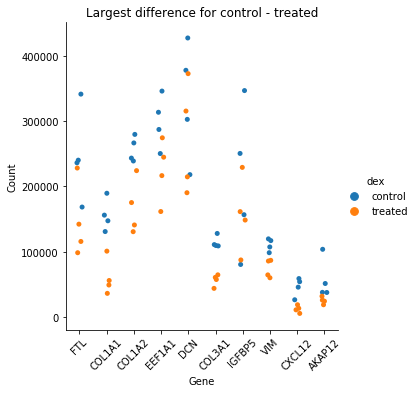

In [42]:
# Data manipulation for largest (most positive) differential expression differences

# Same as above
list_l = []
for gene in df_large.columns:
    for sample in df_large.index:
        list1 = [sample,gene,df_large.loc[sample,gene],meta_cat.loc[sample,'dex']]
        list_l.append(list1)
        
catplot_large = pd.DataFrame(list_l, index=list(range(len(list_s))), columns=['sample', 'gene', 'count','dex'])

sns.catplot(x = 'gene',y = 'count', hue = 'dex',data = catplot_large)
plt.xticks(rotation = 45)
plt.xlabel('Gene')
plt.ylabel('Count')
plt.title('Largest difference for control - treated')